<a href="https://colab.research.google.com/github/Fatima-Usf/Youtube_sentiment_analysis/blob/main/youtube_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Loading data

In [ ]:
yt_comments = pd.read_csv("GBcomments.csv", error_bad_lines=False) #error_bad_lines to fix 'ParserError' because our data contain lines with too many fields

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'


In [ ]:
yt_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


# Data preprocessing

In [ ]:
yt_comments.isna().sum() #checking missing values by getting the summation of all the missing values available

video_id         0
comment_text    11
likes            0
replies          0
dtype: int64

In [ ]:
# Dropping the missing values
yt_comments.dropna(inplace=True) # inplace to keep the DF with valid entries in the same variable


# Applying TextBlob library to get the polarity

In [ ]:
#Getting the polarity of comments
sentiment_polarity =[]
for i in yt_comments["comment_text"]:
  sentiment_polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
# Adding the polarity list to my dataframe as a new column
yt_comments['Polarity']=sentiment_polarity

# Displaying the result ( DF with polarity )

In [ ]:
#displaying the new dataframe
yt_comments.head(10)

,video_id,comment_text,likes,replies,Polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


Filtering positives /negatives comments

In [ ]:
#Filtering positive opinions only
positives_comments = yt_comments[yt_comments['Polarity']==1]

In [ ]:
positives_comments.shape # display how many lines & columns on positives data

(7427, 5)

In [ ]:
positives_comments.head()

,video_id,comment_text,likes,replies,Polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0




---



# `Wordcloud presentation`

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
all_comments = ' '.join(positives_comments['comment_text']) # Join all items in a tuple into one string, using a space as separator:

In [ ]:
wordcloud = WordCloud(width=1200, height= 800, stopwords=stopwords).generate(all_comments)

(-0.5, 1199.5, 799.5, -0.5)

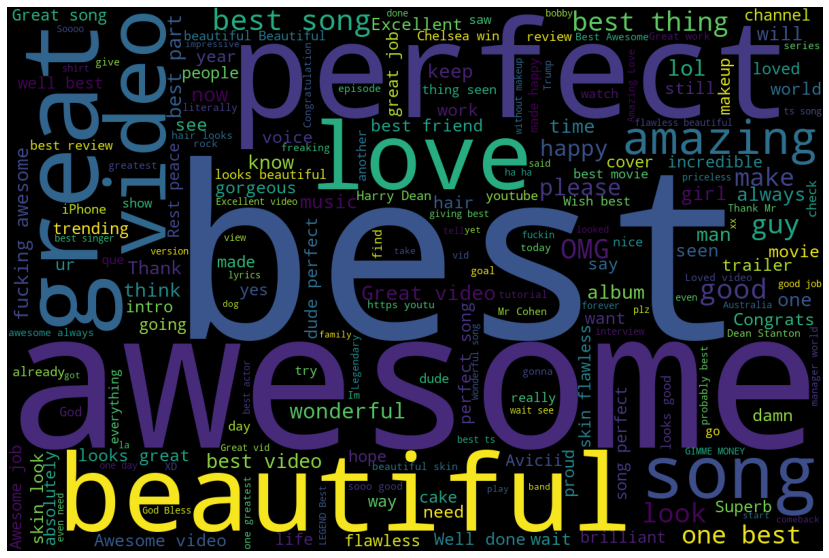

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

Negatives Sentiments


(-0.5, 1199.5, 799.5, -0.5)

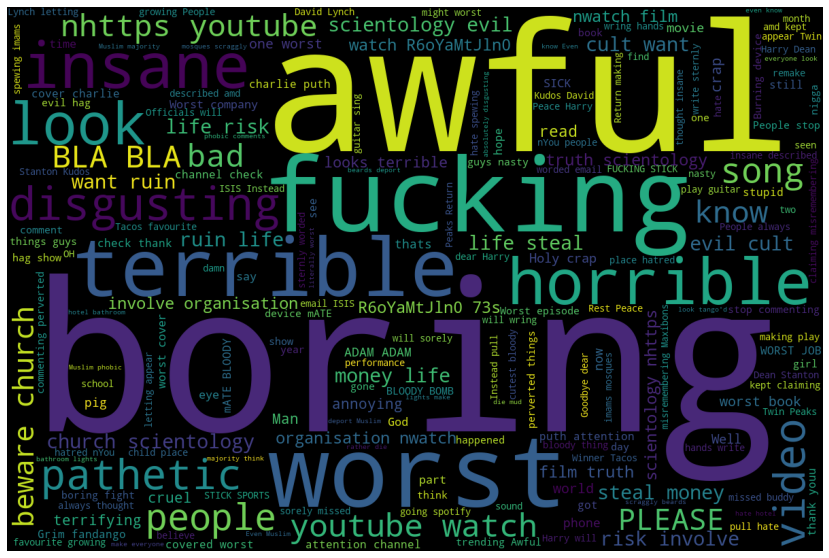

In [ ]:
negatives_comments = yt_comments[yt_comments['Polarity']== -1]
all_comments = ' '.join(negatives_comments['comment_text'])
wordcloud = WordCloud(width=1200, height= 800, stopwords=stopwords).generate(all_comments)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')